# Distribution Before and After Cleaning per Parameter

In [1]:
import pandas as pd
import pyarrow as pa

chartevents_before = pd.read_parquet('../data/chartevents_subset.parquet', engine='pyarrow')
chartevents_after = pd.read_parquet('../data/chartevents_clean.parquet', engine='pyarrow')

In [2]:
# Display descriptive statistics for overview
parameters = pd.DataFrame({
    'LABEL':            ['HR \ bpm',    'NBP \ mmHg',   'SpO2 \ %'],
    'MEASUREMENT':      [220045,        220179,         220277],
    'THRESHOLD_HIGH':   [220046,        223751,         223769],
    'THRESHOLD_LOW':    [220047,        223752,         223770]})

for i, parameter in parameters.iterrows():

    print("__________")
    print(parameter.LABEL)
    display(pd.concat([
        chartevents_before[chartevents_before.ITEMID == parameter.MEASUREMENT].VALUENUM.describe().rename("Measurement Before"),
        chartevents_after[chartevents_after.ITEMID == parameter.MEASUREMENT].VALUENUM_CLEAN.describe().rename("Measurement After"),
        chartevents_before[chartevents_before.ITEMID == parameter.THRESHOLD_HIGH].VALUENUM.describe().rename("High Threshold Before"),
        chartevents_after[chartevents_after.ITEMID == parameter.THRESHOLD_HIGH].VALUENUM_CLEAN.describe().rename("High Threshold After"),
        chartevents_before[chartevents_before.ITEMID == parameter.THRESHOLD_LOW].VALUENUM.describe().rename("Low Threshold Before"),
        chartevents_after[chartevents_after.ITEMID == parameter.THRESHOLD_LOW].VALUENUM_CLEAN.describe().rename("Low Threshold After")
        ], axis=1))


__________
HR \ bpm


Measurement Before  Measurement After  High Threshold Before  \
count        2.761436e+06       2.761407e+06          215658.000000   
mean         9.104084e+01       8.737806e+01             129.327051   
std          6.017932e+03       1.879512e+01             964.245908   
min         -8.800000e+01       0.000000e+00               0.000000   
25%          7.400000e+01       7.400000e+01             120.000000   
50%          8.600000e+01       8.600000e+01             120.000000   
75%          9.900000e+01       9.900000e+01             120.000000   
max          9.999999e+06       2.800000e+02          180160.000000   

       High Threshold After  Low Threshold Before  Low Threshold After  
count         215246.000000         215805.000000        215443.000000  
mean             121.738806             58.370023            53.927910  
std                8.705863            493.771878             5.772224  
min                0.000000            -50.000000             0.000000  
25%              120.000000             50.000000            50.000000  
50%              120.000000             50.000000            50.000000  
75%              120.000000             60.000000            60.000000  
max              300.000000          85160.000000           170.000000

__________
NBP \ mmHg


Measurement Before  Measurement After  High Threshold Before  \
count        1.289001e+06       1.288806e+06          154751.000000   
mean         1.203936e+02       1.198875e+02             170.820783   
std          2.410948e+02       2.250783e+01            1385.829493   
min         -6.900000e+01       0.000000e+00               0.000000   
25%          1.040000e+02       1.040000e+02             160.000000   
50%          1.180000e+02       1.180000e+02             160.000000   
75%          1.340000e+02       1.340000e+02             160.000000   
max          1.411460e+05       3.150000e+02          170170.010000   

       High Threshold After  Low Threshold Before  Low Threshold After  
count         154015.000000         154863.000000        154167.000000  
mean             156.653475             89.738304            88.103115  
std               14.988031            335.615087             9.531794  
min                0.000000            -10.000000             0.000000  
25%              160.000000             90.000000            90.000000  
50%              160.000000             90.000000            90.000000  
75%              160.000000             90.000000            90.000000  
max              300.000000          95160.000000           195.000000

__________
SpO2 \ %


Measurement Before  Measurement After  High Threshold Before  \
count        2.669618e+06       2.669551e+06          212230.000000   
mean         1.009376e+02       9.685754e+01             104.136969   
std          4.437367e+03       3.466979e+00             504.682023   
min          0.000000e+00       0.000000e+00               0.000000   
25%          9.500000e+01       9.500000e+01             100.000000   
50%          9.700000e+01       9.700000e+01             100.000000   
75%          9.900000e+01       9.900000e+01             100.000000   
max          6.363333e+06       1.000000e+02          100185.000000   

       High Threshold After  Low Threshold Before  Low Threshold After  
count         211390.000000         213238.000000        212907.000000  
mean              99.948489             93.028578            90.641416  
std                1.635685            437.636775             3.055741  
min                0.000000            -92.000000             0.000000  
25%              100.000000             90.000000            90.000000  
50%              100.000000             90.000000            90.000000  
75%              100.000000             92.000000            92.000000  
max              100.000000          90100.000000           100.000000

## Boxplot + Histogram incl. KDE curve

- For each parameter
- Distrinution of measurement, high threshold, and low threshold
- Before and after cleaning

**Currently on a subset** (see `.iloc[:10000]` in code) **because the plots do not compute on the entire dataset.** Cause not yet identified.

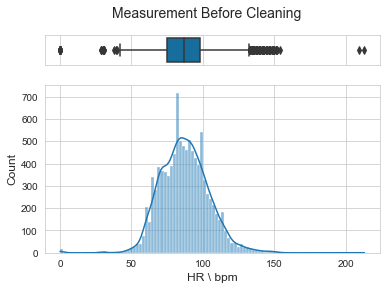

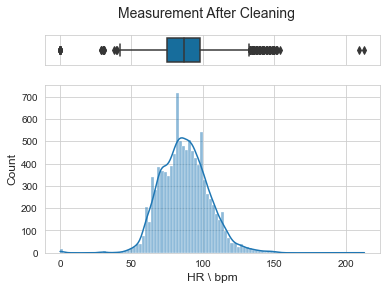

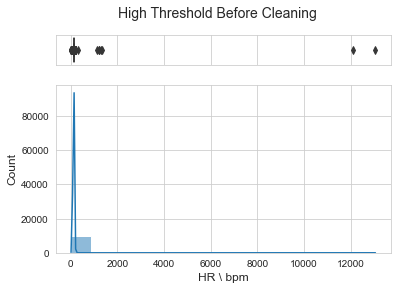

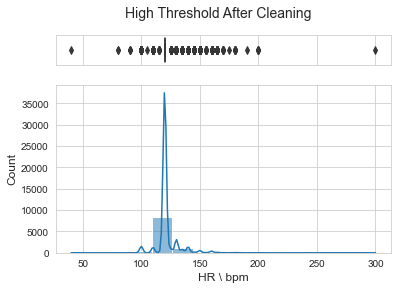

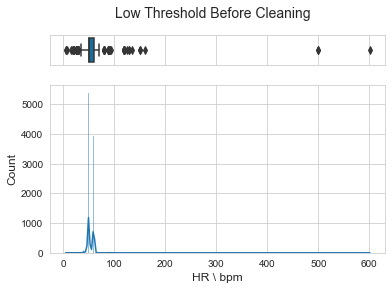

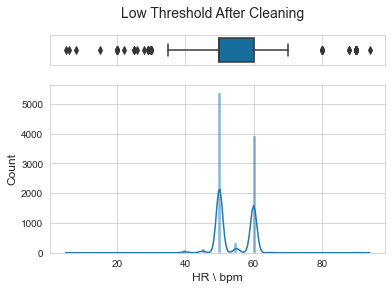

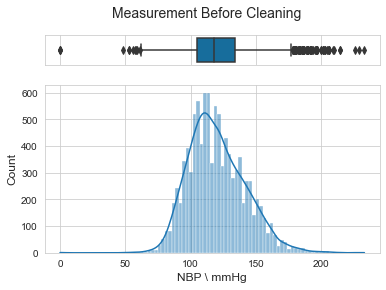

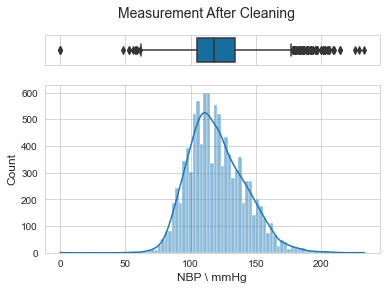

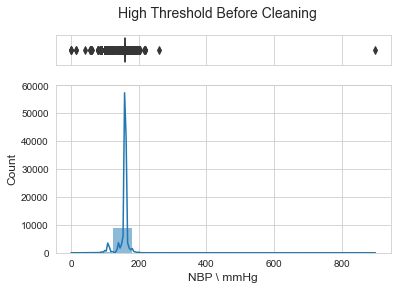

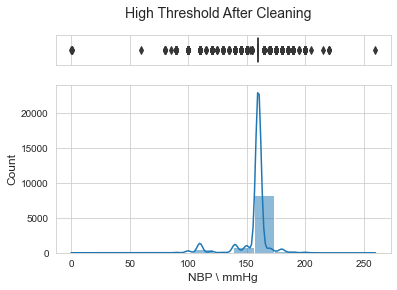

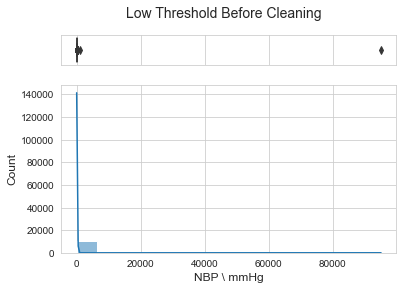

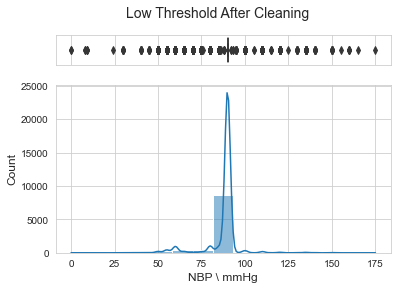

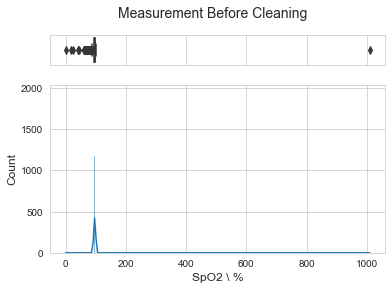

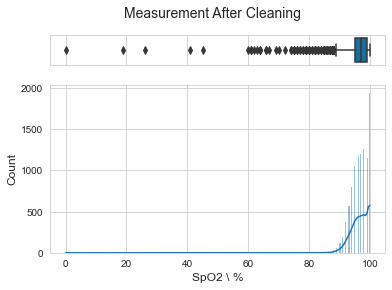

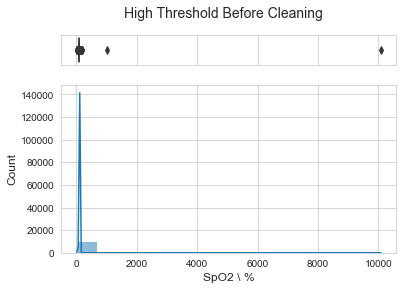

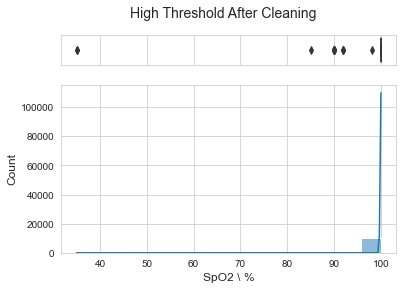

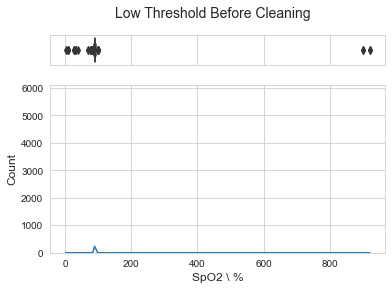

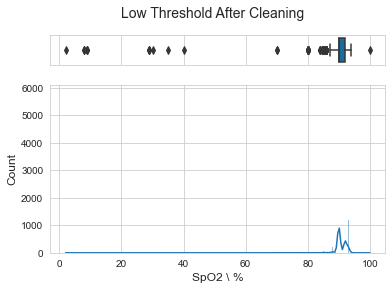

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Path to folder where the figures will be saved as PNGs
path = '../plots/'

parameters = pd.DataFrame({
    'LABEL':            ['HR \ bpm',    'NBP \ mmHg',   'SpO2 \ %'],
    'FILELABEL':        ['HR',          'BP',           'O2'],
    'MEASUREMENT':      [220045,        220179,         220277],
    'THRESHOLD_HIGH':   [220046,        223751,         223769],
    'THRESHOLD_LOW':    [220047,        223752,         223770]})

sns.set_style("whitegrid")
my_palette = sns.color_palette("colorblind")
my_figsize = (6, 4)
my_xvalue_before = "VALUENUM"
my_xvalue_after = "VALUENUM_CLEAN"
my_title_fontsize = 14
my_xlabel_fontsize = 12
my_ylabel_fontsize = 12

for i, parameter in parameters.iterrows():

    # Measurement Before Cleaning
    # plotdata = chartevents_before[chartevents_before.ITEMID == parameter.MEASUREMENT]
    plotdata = chartevents_before[chartevents_before.ITEMID == parameter.MEASUREMENT].iloc[:10000]
    fig, (fig_box, fig_hist) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=my_figsize)
    fig.suptitle("Measurement Before Cleaning", fontsize=my_title_fontsize)
    sns.boxplot(ax=fig_box, data=plotdata, x=my_xvalue_before, palette=my_palette)
    fig_box.set(xlabel="")
    sns.histplot(ax=fig_hist, data=plotdata, x=my_xvalue_before, kde=True, palette=my_palette)
    fig_hist.set_xlabel(parameter.LABEL, fontsize=my_xlabel_fontsize)
    fig_hist.set_ylabel("Count", fontsize=my_ylabel_fontsize)
    # Save as PNG file
    timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_measurment_before_'+'_72-DPI_'+timestamp+'.png'), dpi=72, bbox_inches='tight')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_measurment_before_'+'_300-DPI_'+timestamp+'.png'), dpi=300, bbox_inches='tight')
    # Show plot
    plt.show()

    # Measurement After Cleaning
    # plotdata = chartevents_after[chartevents_after.ITEMID == parameter.MEASUREMENT]
    plotdata = chartevents_after[chartevents_after.ITEMID == parameter.MEASUREMENT].iloc[:10000]
    fig, (fig_box, fig_hist) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=my_figsize)
    fig.suptitle("Measurement After Cleaning", fontsize=my_title_fontsize)
    sns.boxplot(ax=fig_box, data=plotdata, x=my_xvalue_after, palette=my_palette)
    fig_box.set(xlabel="")
    sns.histplot(ax=fig_hist, data=plotdata, x=my_xvalue_after, kde=True, palette=my_palette)
    fig_hist.set_xlabel(parameter.LABEL, fontsize=my_xlabel_fontsize)
    fig_hist.set_ylabel("Count", fontsize=my_ylabel_fontsize)
    # Save as PNG file
    timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_measurment_after_'+'_72-DPI_'+timestamp+'.png'), dpi=72, bbox_inches='tight')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_measurment_after_'+'_300-DPI_'+timestamp+'.png'), dpi=300, bbox_inches='tight')
    # Show plot
    plt.show()

    # High Threshold Before Cleaning
    # plotdata = chartevents_before[chartevents_before.ITEMID == parameter.THRESHOLD_HIGH]
    plotdata = chartevents_before[chartevents_before.ITEMID == parameter.THRESHOLD_HIGH].iloc[:10000]
    fig, (fig_box, fig_hist) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=my_figsize)
    fig.suptitle("High Threshold Before Cleaning", fontsize=my_title_fontsize)
    sns.boxplot(ax=fig_box, data=plotdata, x=my_xvalue_before, palette=my_palette)
    fig_box.set(xlabel="")
    sns.histplot(ax=fig_hist, data=plotdata, x=my_xvalue_before, kde=True, palette=my_palette)
    fig_hist.set_xlabel(parameter.LABEL, fontsize=my_xlabel_fontsize)
    fig_hist.set_ylabel("Count", fontsize=my_ylabel_fontsize)
    # Save as PNG file
    timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_high-threshold_before_'+'_72-DPI_'+timestamp+'.png'), dpi=72, bbox_inches='tight')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_high-threshold_before_'+'_300-DPI_'+timestamp+'.png'), dpi=300, bbox_inches='tight')
    # Show plot
    plt.show()

    # High Threshold After Cleaning
    # plotdata = chartevents_after[chartevents_after.ITEMID == parameter.THRESHOLD_HIGH]
    plotdata = chartevents_after[chartevents_after.ITEMID == parameter.THRESHOLD_HIGH].iloc[:10000]
    fig, (fig_box, fig_hist) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=my_figsize)
    fig.suptitle("High Threshold After Cleaning", fontsize=my_title_fontsize)
    sns.boxplot(ax=fig_box, data=plotdata, x=my_xvalue_after, palette=my_palette)
    fig_box.set(xlabel="")
    sns.histplot(ax=fig_hist, data=plotdata, x=my_xvalue_after, kde=True, palette=my_palette)
    fig_hist.set_xlabel(parameter.LABEL, fontsize=my_xlabel_fontsize)
    fig_hist.set_ylabel("Count", fontsize=my_ylabel_fontsize)
    # Save as PNG file
    timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_high-threshold_after_'+'_72-DPI_'+timestamp+'.png'), dpi=72, bbox_inches='tight')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_high-threshold_after_'+'_300-DPI_'+timestamp+'.png'), dpi=300, bbox_inches='tight')
    # Show plot
    plt.show()

    # Low Threshold Before Cleaning
    # plotdata = chartevents_before[chartevents_before.ITEMID == parameter.THRESHOLD_LOW]
    plotdata = chartevents_before[chartevents_before.ITEMID == parameter.THRESHOLD_LOW].iloc[:10000]
    fig, (fig_box, fig_hist) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=my_figsize)
    fig.suptitle("Low Threshold Before Cleaning", fontsize=my_title_fontsize)
    sns.boxplot(ax=fig_box, data=plotdata, x=my_xvalue_before, palette=my_palette)
    fig_box.set(xlabel="")
    sns.histplot(ax=fig_hist, data=plotdata, x=my_xvalue_before, kde=True, palette=my_palette)
    fig_hist.set_xlabel(parameter.LABEL, fontsize=my_xlabel_fontsize)
    fig_hist.set_ylabel("Count", fontsize=my_ylabel_fontsize)
    # Save as PNG file
    timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_low-threshold_before_'+'_72-DPI_'+timestamp+'.png'), dpi=72, bbox_inches='tight')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_low-threshold_before_'+'_300-DPI_'+timestamp+'.png'), dpi=300, bbox_inches='tight')
    # Show plot
    plt.show()

    # Low Threshold After Cleaning
    # plotdata = chartevents_after[chartevents_after.ITEMID == parameter.THRESHOLD_LOW]
    plotdata = chartevents_after[chartevents_after.ITEMID == parameter.THRESHOLD_LOW].iloc[:10000]
    fig, (fig_box, fig_hist) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=my_figsize)
    fig.suptitle("Low Threshold After Cleaning", fontsize=my_title_fontsize)
    sns.boxplot(ax=fig_box, data=plotdata, x=my_xvalue_after, palette=my_palette)
    fig_box.set(xlabel="")
    sns.histplot(ax=fig_hist, data=plotdata, x=my_xvalue_after, kde=True, palette=my_palette)
    fig_hist.set_xlabel(parameter.LABEL, fontsize=my_xlabel_fontsize)
    fig_hist.set_ylabel("Count", fontsize=my_ylabel_fontsize)
    # Save as PNG file
    timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_low-threshold_after_'+'_72-DPI_'+timestamp+'.png'), dpi=72, bbox_inches='tight')
    # plt.savefig(str(path+'distribution_before-vs-after-cleaning_'+str(parameter.FILELABEL)+'_low-threshold_after_'+'_300-DPI_'+timestamp+'.png'), dpi=300, bbox_inches='tight')
    # Show plot
    plt.show()
